<a href="https://colab.research.google.com/github/genesisoyelaja/Regression-Model-and-LSTM-on-stock-market-data/blob/main/Gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

###Standard Libraries for DAta Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

###Sklearn Modules for Data Preprocesssing

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

###Sklearn modules for Model Selection

In [3]:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

###Sklearn modules for Model Evaluation & Improvement

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.model_selection import RandomizedSearchCV

###Standard libraries for data visualization

In [5]:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

###Miscellaneous Utilitiy Libraries

In [6]:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

##Test


In [7]:
dataset = pd.read_excel("sdum.xlsx")
dataset.head()

,Reg No,Divison,Div Status,On Reg,Currenly Prac,Providin Direct Patient Care,WorkPlace County,Gender,Age,CCPS Country,Left
0,968533,Midwife Tutors Division,Registered,Yes,No,Yes,Monaghan,Male,23,Australia,0
1,13835,Advanced Nurse Practitioners Division,Registered,Yes,No,Yes,Longford,Female,34,Australia,0
2,210706,Midwife Tutors Division,Registered,Yes,No,Yes,Waterford,Female,64,Australia,0
3,301679,Intellectual Disability Nurses Division,Registered,No,No,No,Meath,Female,64,Australia,0
4,955667,Midwife Tutors Division,Registered,Yes,No,Yes,Monaghan,Male,24,Australia,0


In [8]:
identity = dataset["Reg No"]
dataset = dataset.drop(columns="Reg No")

In [9]:
dataset= pd.get_dummies(dataset)

In [10]:
dataset

,Age,Left,Divison_Advanced Midwife Practitioners Division,Divison_Advanced Nurse Practitioners Division,Divison_Children's Nurses Division,Divison_General Nurses Division,Divison_Intellectual Disability Nurses Division,Divison_Midwife Prescribers Division,Divison_Midwife Tutors Division,Divison_Midwives Division,Divison_Nurse Prescribers Division,Divison_Nurse Tutors Division,Divison_Psychiatric Nurses Division,Divison_Public Health Nurses Division,Div Status _Registered,Div Status _Removed Non Payment,Div Status _Voluntary Removal,On Reg_No,On Reg_Yes,Currenly Prac_No,Currenly Prac_Yes,Providin Direct Patient Care_No,Providin Direct Patient Care_Yes,WorkPlace County_Carlow,WorkPlace County_Cavan,WorkPlace County_Clare,WorkPlace County_Cork,WorkPlace County_Donegal,WorkPlace County_Dublin,WorkPlace County_Galway,WorkPlace County_Kerry,WorkPlace County_Kildare,WorkPlace County_Kilkenny,WorkPlace County_Laois,WorkPlace County_Leitrim,WorkPlace County_Longford,WorkPlace County_Louth,WorkPlace County_Mayo,WorkPlace County_Meath,WorkPlace County_Monaghan,WorkPlace County_Offaly,WorkPlace County_Roscommon,WorkPlace County_Sligo,WorkPlace County_Tipperary,WorkPlace County_Waterford,WorkPlace County_Westmeath,WorkPlace County_Wexford,WorkPlace County_Wicklow,Gender_Female,Gender_Male,CCPS Country_Australia,CCPS Country_Austria,CCPS Country_Bahrain,CCPS Country_Canada,CCPS Country_Ireland,CCPS Country_Norway,CCPS Country_Romania,CCPS Country_Spain,CCPS Country_Switzerland,CCPS Country_United Arab Emirates,CCPS Country_United Kingdom,CCPS Country_United Sates of America
0,23,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,34,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,64,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,64,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,24,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84569,56,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
84570,67,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
84571,50,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
84572,42,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
dataset = pd.concat([dataset, identity], axis = 1)
dataset.head(5)

,Age,Left,Divison_Advanced Midwife Practitioners Division,Divison_Advanced Nurse Practitioners Division,Divison_Children's Nurses Division,Divison_General Nurses Division,Divison_Intellectual Disability Nurses Division,Divison_Midwife Prescribers Division,Divison_Midwife Tutors Division,Divison_Midwives Division,Divison_Nurse Prescribers Division,Divison_Nurse Tutors Division,Divison_Psychiatric Nurses Division,Divison_Public Health Nurses Division,Div Status _Registered,Div Status _Removed Non Payment,Div Status _Voluntary Removal,On Reg_No,On Reg_Yes,Currenly Prac_No,Currenly Prac_Yes,Providin Direct Patient Care_No,Providin Direct Patient Care_Yes,WorkPlace County_Carlow,WorkPlace County_Cavan,WorkPlace County_Clare,WorkPlace County_Cork,WorkPlace County_Donegal,WorkPlace County_Dublin,WorkPlace County_Galway,WorkPlace County_Kerry,WorkPlace County_Kildare,WorkPlace County_Kilkenny,WorkPlace County_Laois,WorkPlace County_Leitrim,WorkPlace County_Longford,WorkPlace County_Louth,WorkPlace County_Mayo,WorkPlace County_Meath,WorkPlace County_Monaghan,WorkPlace County_Offaly,WorkPlace County_Roscommon,WorkPlace County_Sligo,WorkPlace County_Tipperary,WorkPlace County_Waterford,WorkPlace County_Westmeath,WorkPlace County_Wexford,WorkPlace County_Wicklow,Gender_Female,Gender_Male,CCPS Country_Australia,CCPS Country_Austria,CCPS Country_Bahrain,CCPS Country_Canada,CCPS Country_Ireland,CCPS Country_Norway,CCPS Country_Romania,CCPS Country_Spain,CCPS Country_Switzerland,CCPS Country_United Arab Emirates,CCPS Country_United Kingdom,CCPS Country_United Sates of America,Reg No
0,23,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,968533
1,34,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,13835
2,64,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,210706
3,64,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,301679
4,24,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,955667


In [12]:
response = dataset['Left']
dataset = dataset.drop(columns='Left')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response,stratify=response, test_size = 0.2, random_state = 0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (67659, 62)
Number transactions y_train dataset:  (67659,)
Number transactions X_test dataset:  (16915, 62)
Number transactions y_test dataset:  (16915,)


In [14]:
train_identity = X_train['Reg No']
X_train = X_train.drop(columns = ['Reg No'])
test_identity = X_test['Reg No']
X_test = X_test.drop(columns = ['Reg No'])

In [15]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

##Modelling

###Import Models

In [16]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))

###Evaluate Model Results

In [ ]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD','Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=20, random_state=0,shuffle=True)
# accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,round(cv_auc_results.mean()*100, 2),round(cv_auc_results.std()*100, 2),round(cv_acc_results.mean()*100, 2),round(cv_acc_results.std()*100, 2)]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

###Optimal Number of K Neighbors

(array([0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06]),
 [Text(0, 0.9400000000000001, '0.94'),
  Text(0, 0.9600000000000001, '0.96'),
  Text(0, 0.9800000000000001, '0.98'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.02, '1.02'),
  Text(0, 1.04, '1.04'),
  Text(0, 1.06, '1.06')])

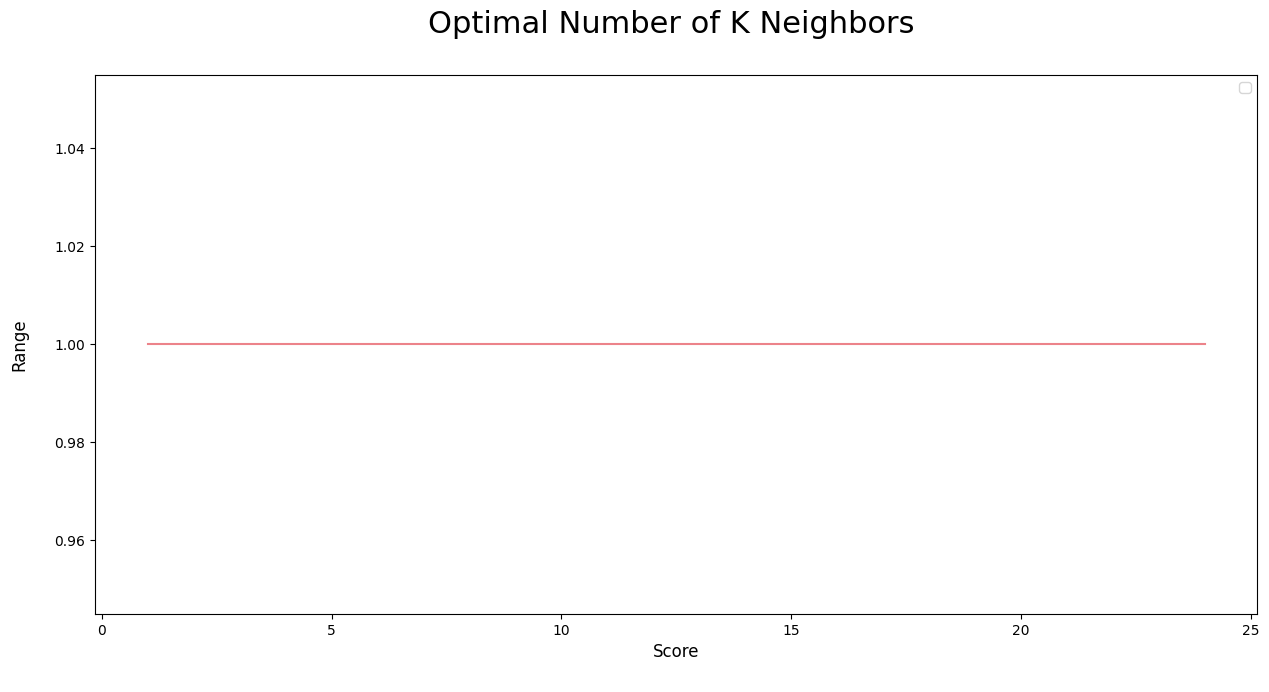

In [ ]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each)
#set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',
horizontalalignment="center", fontstyle = "normal",
 fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

###Optimal Number of Trees for Random Forest Model

(array([0.9982, 0.9984, 0.9986, 0.9988, 0.999 , 0.9992, 0.9994, 0.9996,
        0.9998, 1.    , 1.0002]),
 [Text(0, 0.9982, '0.9982'),
  Text(0, 0.9984, '0.9984'),
  Text(0, 0.9985999999999999, '0.9986'),
  Text(0, 0.9988, '0.9988'),
  Text(0, 0.999, '0.9990'),
  Text(0, 0.9992, '0.9992'),
  Text(0, 0.9994, '0.9994'),
  Text(0, 0.9995999999999999, '0.9996'),
  Text(0, 0.9998, '0.9998'),
  Text(0, 1.0, '1.0000'),
  Text(0, 1.0002, '1.0002')])

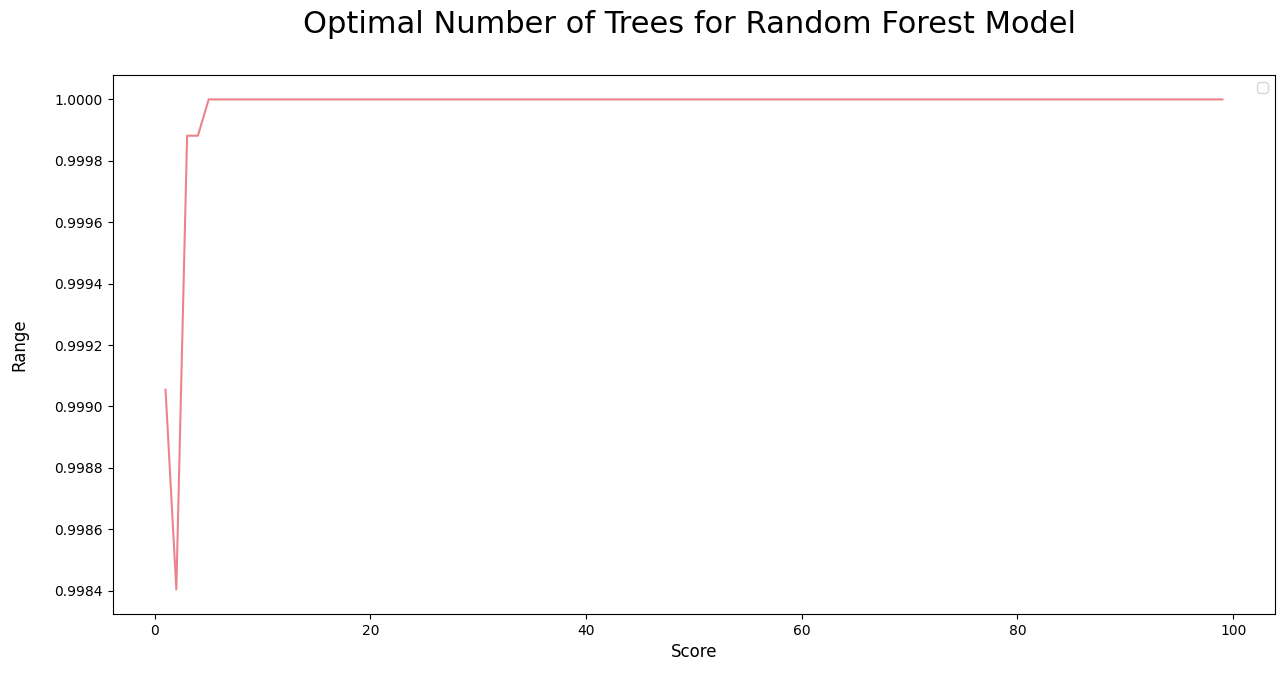

In [ ]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = each, random_state = 1)
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

###Fitting Logistic Regression to the Training set

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression',
acc, prec, rec, f1, f2]], columns = ['Model',
'Accuracy', 'Precision', 'Recall', 'F1 Score',
'F2 Score'])
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  Logistic Regression       1.0        1.0     1.0       1.0       1.0


###Fitting SVM (SVC class) to the Training set

In [ ]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame(
[['SVM (Linear)', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  Logistic Regression       1.0        1.0     1.0       1.0       1.0
1         SVM (Linear)       1.0        1.0     1.0       1.0       1.0


<ipython-input-53-4ddca45560e1>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


###Fitting KNN to the Training set:

In [ ]:
classifier = KNeighborsClassifier(
n_neighbors = 8,
metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred  = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours',
acc, prec, rec, f1, f2]], columns = ['Model',
 'Accuracy', 'Precision', 'Recall',
 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0   Logistic Regression       1.0        1.0     1.0       1.0       1.0
1          SVM (Linear)       1.0        1.0     1.0       1.0       1.0
2  K-Nearest Neighbours       1.0        1.0     1.0       1.0       1.0


<ipython-input-54-ab8e15f1b027>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


###Fitting Naive Byes to the Training set

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Naive Byes', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0   Logistic Regression       1.0        1.0     1.0       1.0       1.0
1          SVM (Linear)       1.0        1.0     1.0       1.0       1.0
2  K-Nearest Neighbours       1.0        1.0     1.0       1.0       1.0
3            Naive Byes       1.0        1.0     1.0       1.0       1.0


<ipython-input-55-ad146bf1d76e>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


###Fitting Decision Tree to the Training set

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0   Logistic Regression       1.0        1.0     1.0       1.0       1.0
1          SVM (Linear)       1.0        1.0     1.0       1.0       1.0
2  K-Nearest Neighbours       1.0        1.0     1.0       1.0       1.0
3            Naive Byes       1.0        1.0     1.0       1.0       1.0
4         Decision Tree       1.0        1.0     1.0       1.0       1.0


<ipython-input-56-35921fb21dee>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


###Fitting Random Forest to the Training set

In [ ]:
classifier = RandomForestClassifier(n_estimators = 45,
criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
from sklearn.metrics import confusion_matrix
accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Random Forest', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Accuracy","Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0   Logistic Regression       1.0        1.0     1.0       1.0       1.0
1          SVM (Linear)       1.0        1.0     1.0       1.0       1.0
2  K-Nearest Neighbours       1.0        1.0     1.0       1.0       1.0
3            Naive Byes       1.0        1.0     1.0       1.0       1.0
4         Decision Tree       1.0        1.0     1.0       1.0       1.0
5         Random Forest       1.0        1.0     1.0       1.0       1.0


<ipython-input-57-caa24387fcc5>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


###TOP MODEL

In [ ]:
accuracies = cross_val_score(estimator = classifier,X = X_train, y = y_train, cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 1.00 (+/- 0.00)


###Prediction Confusion Matrix

Text(0.5, 23.52222222222222, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

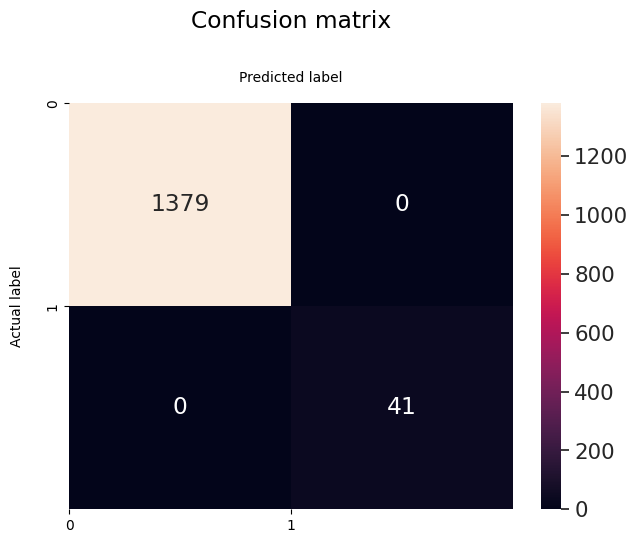

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

###Plot Randomforest  ROC

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

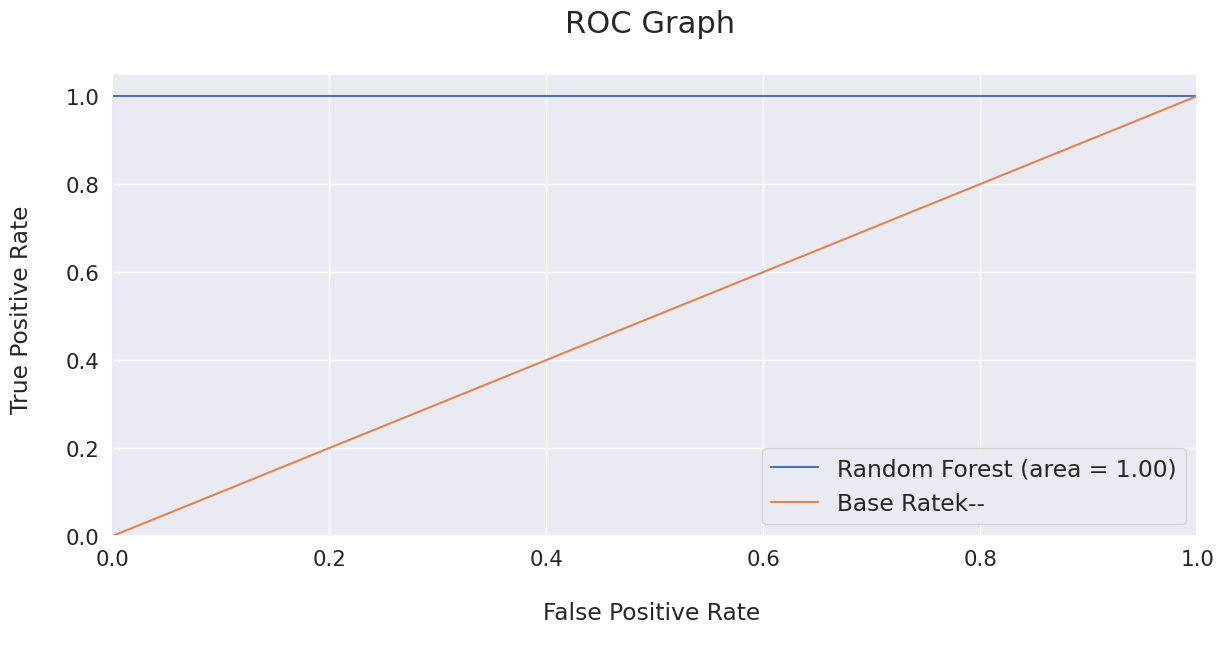

In [ ]:
classifier.fit(X_train, y_train)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot Randomforest  ROC
plt.plot(rf_fpr, rf_tpr,
label='Random Forest (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium",
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium",
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "22",
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

###Analyzing Coefficients

In [ ]:
feature_importances = pd.concat([pd.DataFrame(dataset.drop(columns = 'Reg No').columns, columns = ["features"]),
pd.DataFrame(np.transpose(classifier.feature_importances_),
columns = ["coef"])],axis = 1)
feature_importances.sort_values("coef", ascending = False)

,features,coef
15,Div Status _Voluntary Removal,0.519987
13,Div Status _Registered,0.286888
14,Div Status _Removed Non Payment,0.052460
59,CCPS Country_United Kingdom,0.018036
56,CCPS Country_Spain,0.010530
...,...,...
28,WorkPlace County_Galway,0.000348
40,WorkPlace County_Roscommon,0.000256
33,WorkPlace County_Leitrim,0.000226
34,WorkPlace County_Longford,0.000219


###Prepare to Optimize Model

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 20000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 2400, 4600, 6800, 9000, 11200, 13400, 15600, 17800, 20000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


###Optimizing The Model

In [ ]:
rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_

def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    some = np.nan_to_num((errors / y_test),nan=np.nan, posinf=np.nan)
    mape = 100 *  np.nanmean(some)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.
Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.
Improvement of 0.00%.


###probability score

In [ ]:
y_pred_probs = best_random.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]
y_pred_new = best_random.predict(X_test)

###Revalidate final results with Confusion Matrix

[[1379    0]
 [   0   41]]
Test Data Accuracy: 1.0000


<Figure size 2800x2000 with 0 Axes>

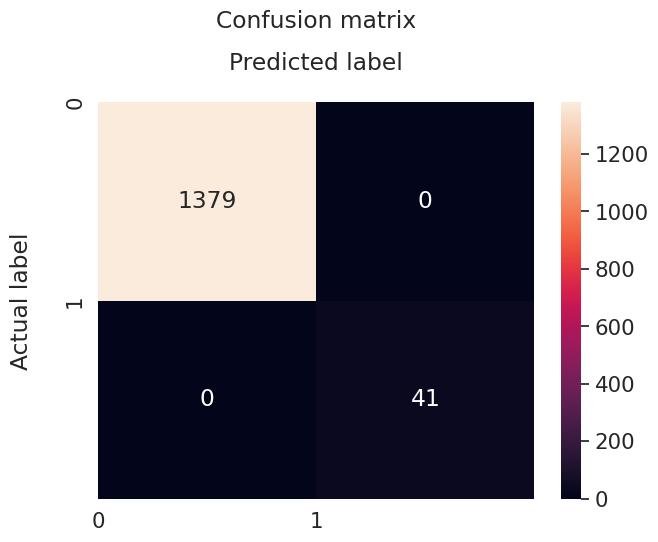

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
#Confusion Matrix as a quick Crosstab:
pd.crosstab(y_test,pd.Series(y_pred),rownames=['ACTUAL'],colnames=['PRED'])
#visualize Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

##FINAL Results

In [ ]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results['new_pred']= y_pred_new
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
final_results

,Reg No,Left,predictions,new_pred,propensity_to_churn(%),Ranking
709,281034,0,0,0,0.00,10
1795,974993,0,0,0,0.01,4
6495,137064,0,0,0,0.00,10
6479,209972,0,0,0,0.00,10
1630,911722,0,0,0,0.01,4
...,...,...,...,...,...,...
6330,233404,0,0,0,0.01,3
3102,474422,0,0,0,0.01,3
4691,759737,0,0,0,0.00,4
3549,416403,0,0,0,0.00,4


#### Random Forest Tree

In [ ]:
from sklearn.tree import export_graphviz
estimator = best_random.estimators_[5]


In [ ]:
export_graphviz(estimator,out_file='new_tt_tree.dot', max_depth = 3,feature_names = dataset.drop(columns = 'Reg No').columns,class_names = 'Attrited_Customers',rounded = True, proportion = False, precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'new_tt_tree.dot', '-o', 'new_tt_tree.jpg', '-Gdpi=600'])

0

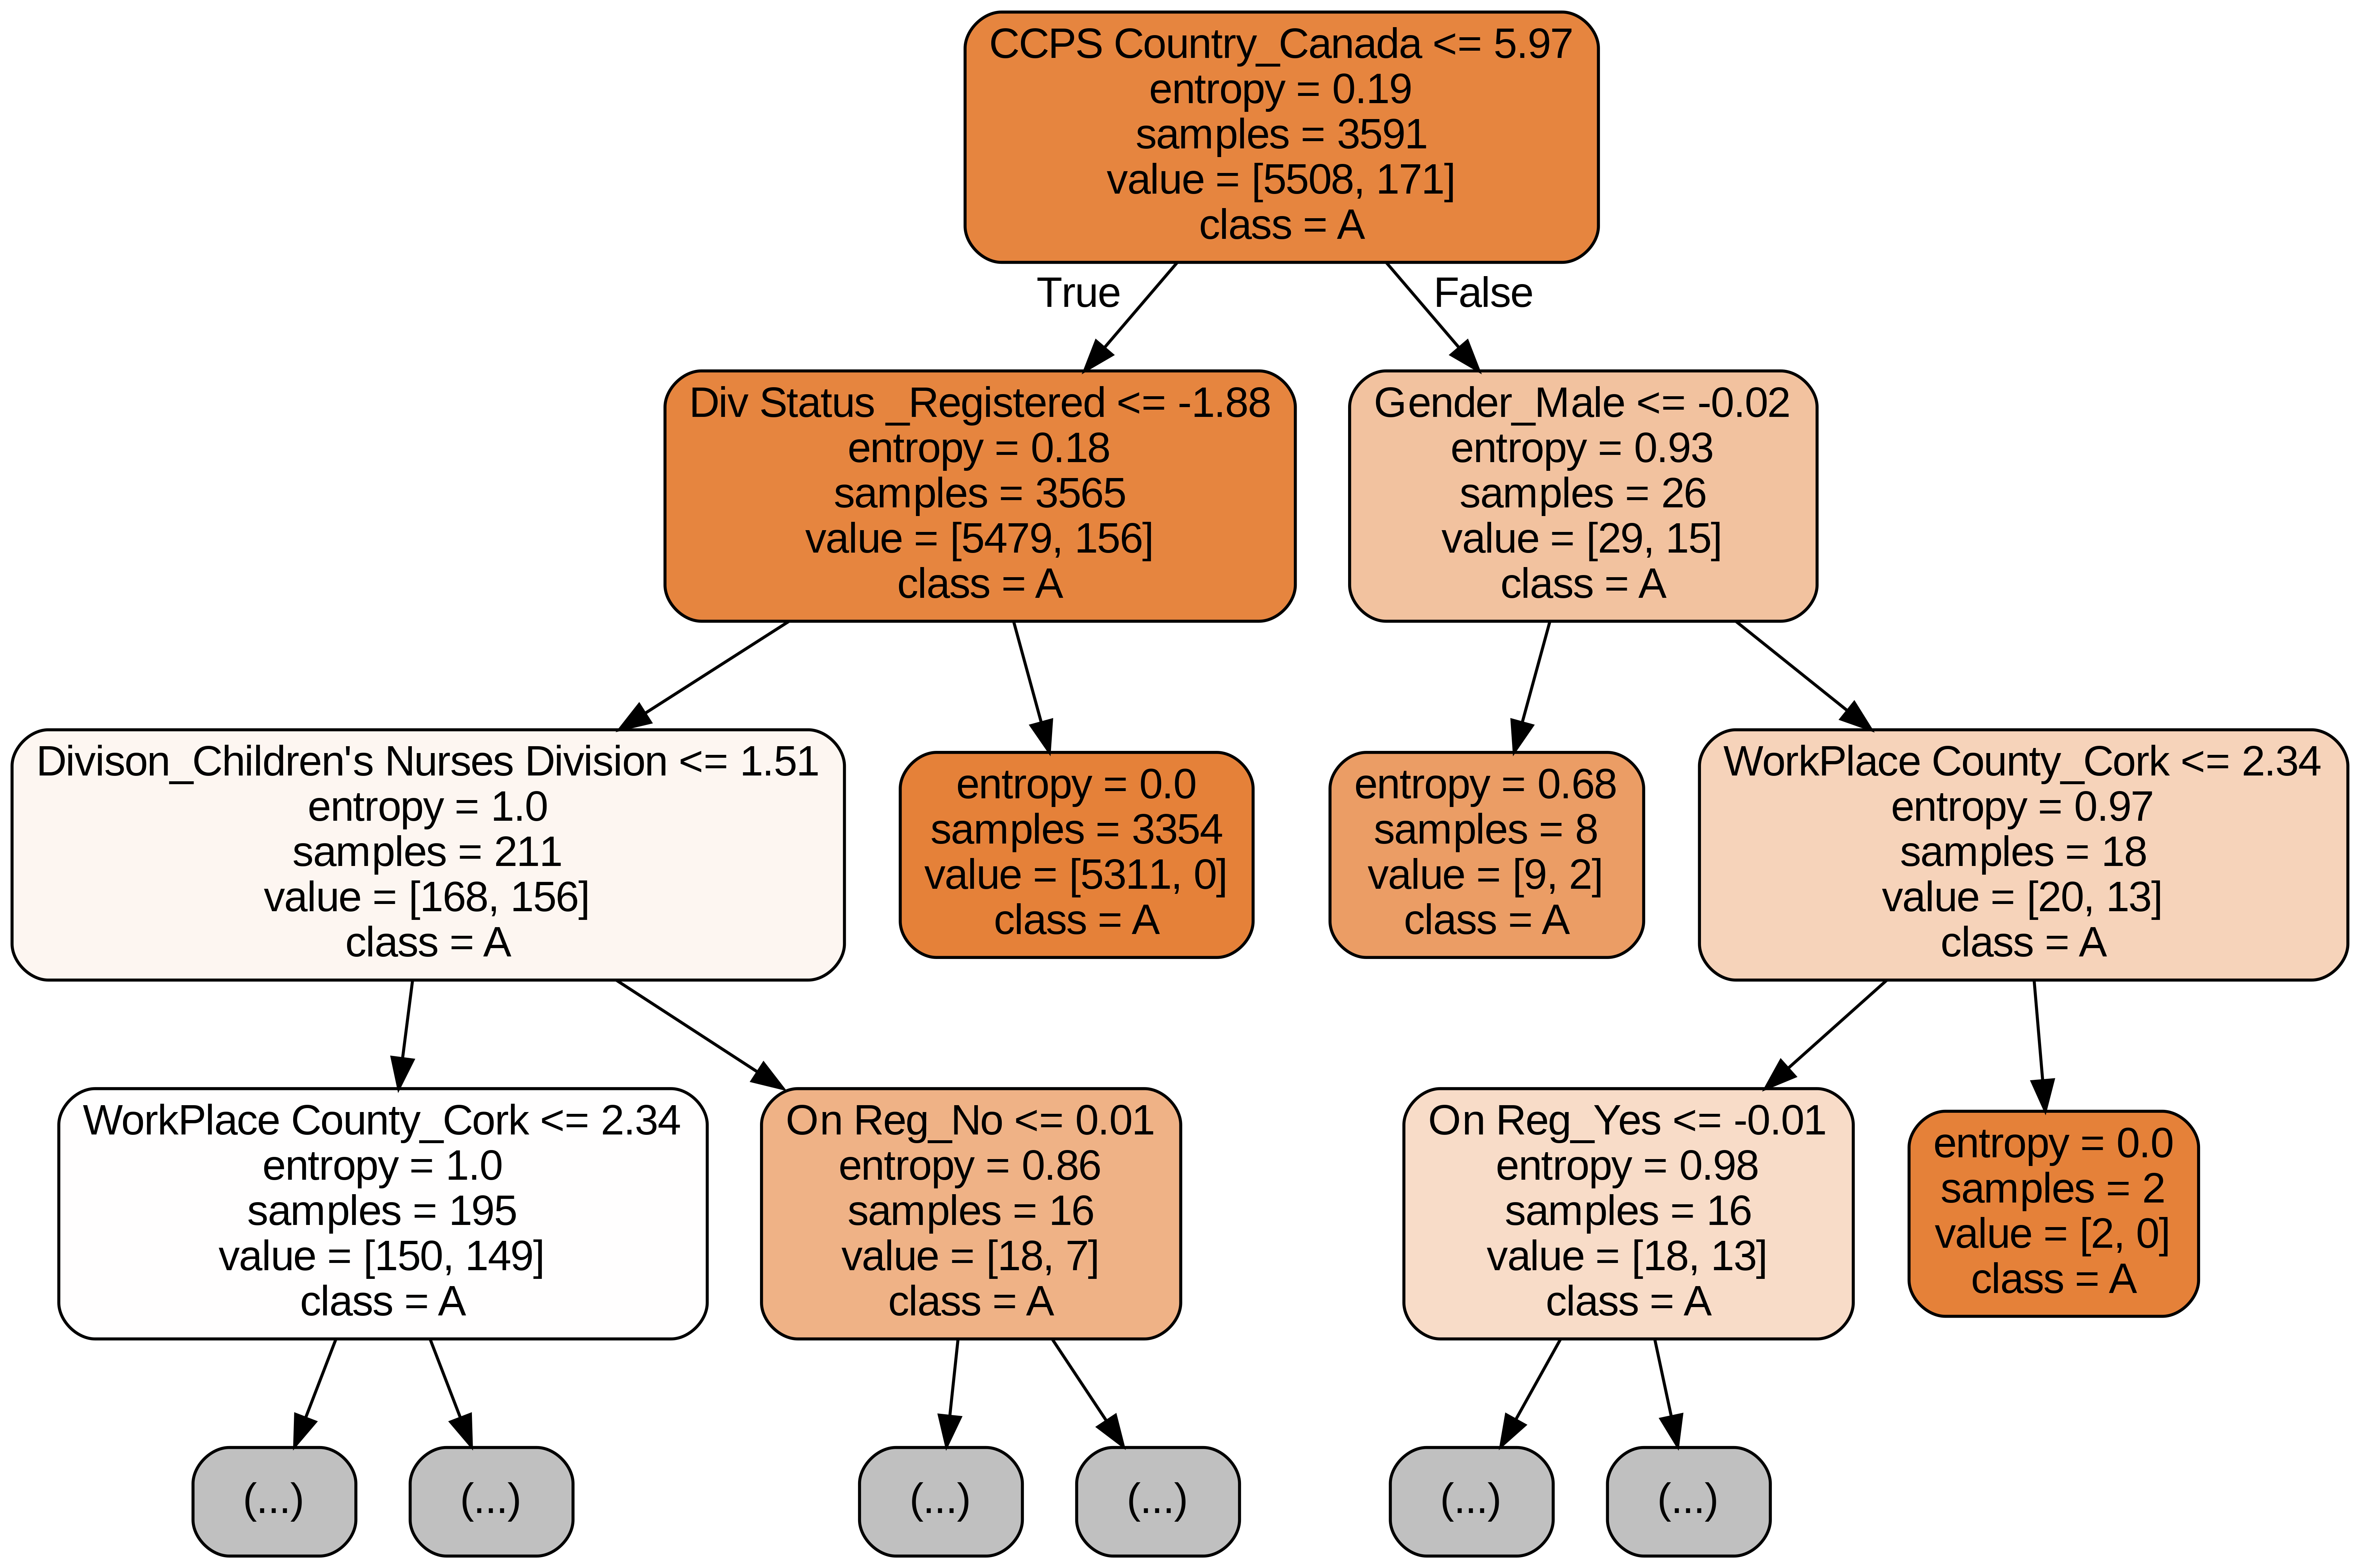

In [ ]:
from IPython.display import Image
Image(filename = 'new_tt_tree.jpg')